# import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random 
import os

In [22]:
M = 1
ndoor = 3
nPrize = 1
cntInitialChoice = 0
cntRevisedChoice = 0

for i in range(1,M):  
    door1 = list(range(1,ndoor+1))    
    
    Prize = random.choices(door1, weights = [1/ndoor]*ndoor, k = nPrize) # Prize    
    print(Prize)
    initialChoice = random.choice(door1)
    
    door1.remove(Prize)
    if Prize!=initialChoice:
        door1.remove(initialChoice)
    
    open = random.choice(door1)
    
    door2 = list(range(1,ndoor+1))
    door2.remove(open)
    door2.remove(initialChoice)
    
    revisedChoice = random.choice(door2)  
    
    if initialChoice==Prize:
        cntInitialChoice=cntInitialChoice+1
    if revisedChoice==Prize:
        cntRevisedChoice=cntRevisedChoice+1
    
print(cntInitialChoice/M)
print(cntRevisedChoice/M)



0.0
0.0


In [23]:
## Monty Hall problem

Stay: 0.399
Change: 0.534


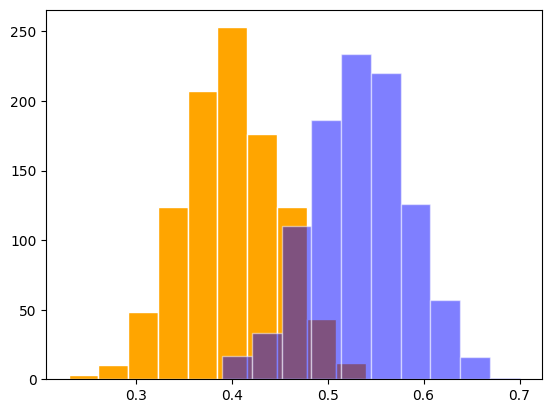

In [ ]:
M = 1000
n = 100
ndoor   = 5
nPrize  = 2
nChoice = 1
nopen   = 1
nrevizedChoice = 1

probInit = [0]*M
probRevi = [0]*M

for j in range(0,M):  
    cntInitialChoice = 0
    cntRevisedChoice = 0
    for i in range(0,n):  
        door1 = list(range(1,ndoor+1))    
        
        Prize = random.sample(door1, nPrize) # Prize    
    #    print('Prize',Prize)
        initialChoice = random.sample(door1, nChoice)
    #    print('initialChoice',initialChoice)
                                      
        #Prize = set(Prize)
        #initialChoice = set(initialChoice)
        door1 = set(door1)
        union = set(Prize).union(set(initialChoice))
    #    print('door1',door1)
        door1 = door1-union
        door1 = list(door1)
        open = random.sample(door1,nopen)
    #    print('open',open)
        
        door2 = list(range(1,ndoor+1))
        diff  = set(door2)-set(open)-set(initialChoice)
        door2 = list(diff) 
    #    print('door2',door2)
        
        revisedChoice = random.sample(door2,nrevizedChoice)  
    #    print('revisedChoice',revisedChoice)
        
        if len(set(initialChoice).intersection(Prize))>0:
            cntInitialChoice=cntInitialChoice+1
        if len(set(revisedChoice).intersection(Prize))>0: 
            cntRevisedChoice=cntRevisedChoice+1
    
    probInit[j] = (cntInitialChoice/n)
    probRevi[j] = (cntRevisedChoice/n)

plt.hist(probInit, color="orange",edgecolor='white')
plt.hist(probRevi, color="blue"  ,edgecolor='white', alpha=0.5);
print("Stay:", round(np.mean(probInit),3))
print("Change:", round(np.mean(probRevi),3))